In [86]:
import six
import sys

sys.modules['sklearn.externals.six'] = six
import numpy as np
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
random_state = 2000



In [87]:
fitness = mlrose.Queens()


In [116]:
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize = False, max_val = 8)


In [96]:
def plot_fitness_iteration(curve, title, x="Iteration", y="Fitness"):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    length = len(curve)
    plt.plot(range(length), curve, label=y, lw=2)
    plt.legend(loc="best")
    plt.show()

In [118]:
# Define decay schedule
schedule = mlrose.ExpDecay()

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using simulated annealing
best_state, best_fitness , sacurve = mlrose.simulated_annealing(problem, schedule = schedule,max_attempts = 10, max_iters = 10,init_state = init_state, random_state = 1)

print(best_state)

print(best_fitness)


[2 1 2 6 2 3 6 0]
8.0


In [119]:
# Solve problem using simulated annealing
best_state, best_fitness , sacurve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 100, max_iters = 1000,
                                                      init_state = init_state, random_state = 1)

print(best_state)

print(best_fitness)


[4 2 0 6 1 7 5 3]
0.0


Randomized Hill Climbing - Total Function Evaluations: 0
[7 6 5 4 3 2 1 0]
28.0


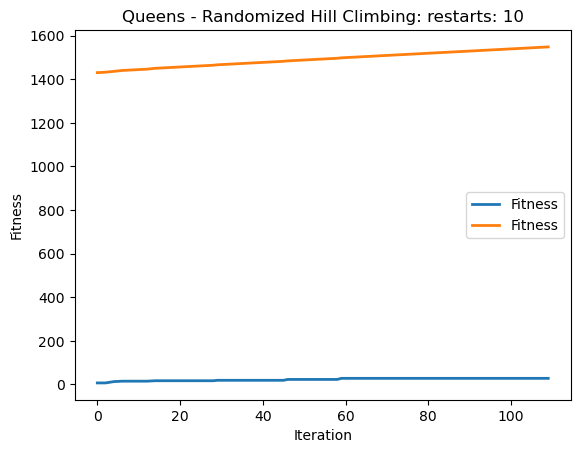

In [111]:
# Solve problem using Random Hill
max_attempts = 50
max_iters = 250
restarts = 10
global eval_count
eval_count = 0
best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
print("Randomized Hill Climbing - Total Function Evaluations:", eval_count)
print(best_state)

print(best_fitness)

plot_fitness_iteration(rhc_curve,
                       "Queens - Randomized Hill Climbing: restarts: {}".format(restarts))